In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
hr=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics.csv')
hr_dummies = pd.get_dummies(hr)

In [3]:
train, test = train_test_split(hr_dummies,test_size=0.3,random_state=100)

In [4]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

In [5]:
#DECISION TREE, RANDOM FOREST, KNN, ADA BOOS TOGETHER

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

l=[]
model_1=DecisionTreeClassifier(random_state=100,max_depth=3)
model_2=RandomForestClassifier(random_state=100,n_estimators=300)
model_3=KNeighborsClassifier(n_neighbors=5)
model_4=AdaBoostClassifier(random_state=100, n_estimators=800)
a=(model_1,model_2,model_3,model_4)
for i in a:
    i.fit(train_x,train_y)
    pred_test=i.predict(test_x)
    a=accuracy_score(test_y,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost']).sort_values('Accuracy',ascending=False))
print(df)

                Accuracy
Random Forest  85.941043
Ada Boost      84.353741
Decision Tree  82.312925
KNN            79.818594


# When do we use KNN algorithm?
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power

Let us take a few examples to  place KNN in the scale :

Model comparisonKNN algorithm fairs across all parameters of considerations. It is commonly used for its easy of interpretation and low calculation time

# Algorithm Steps
- Identify Euclidean Distance Between the test sample with all training samples
- Sort the training in the ascending order of euclidean distance
- Choose K - Neighbours i.e choose first K rows after sorting
- Do polling on target column
- Prediction will be for that class which has highest count

In [5]:
train_x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
178,46,526,1,2,1,244,2,92,3,3,...,0,0,1,0,1,0,0,1,1,0
971,51,1405,11,2,1,1367,4,82,2,4,...,0,0,0,0,0,0,1,1,1,0
1172,29,469,10,3,1,1650,3,42,2,2,...,0,0,1,0,0,0,1,1,1,0
667,41,1085,2,4,1,927,2,57,1,1,...,0,0,0,0,1,0,0,1,0,1
399,31,329,1,2,1,530,4,98,2,1,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from scipy.spatial.distance import euclidean
test_sample = test_x.iloc[0]
df_eds = pd.DataFrame(columns=['index','euclidean'])

In [7]:
test_sample = test_x.iloc[0]
test_sample

Age                                    32
DailyRate                             116
DistanceFromHome                       13
Education                               3
EmployeeCount                           1
EmployeeNumber                       1234
EnvironmentSatisfaction                 3
HourlyRate                             77
JobInvolvement                          2
JobLevel                                1
JobSatisfaction                         2
MonthlyIncome                        2743
MonthlyRate                          7331
NumCompaniesWorked                      1
PercentSalaryHike                      20
PerformanceRating                       4
RelationshipSatisfaction                3
StandardHours                          80
StockOptionLevel                        1
TotalWorkingYears                       2
TrainingTimesLastYear                   2
WorkLifeBalance                         3
YearsAtCompany                          2
YearsInCurrentRole                

In [13]:
for index,row in train_x.iterrows():
    curr_ed = euclidean(test_sample.values,row.values)
    df_eds = df_eds.append({'index': index,'euclidean':curr_ed},ignore_index=True)
df_eds=df_eds.sort_values(by='euclidean')
neighbors =df_eds.head()

train_y.loc[neighbors['index']].value_counts().index[0]

1

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Accuracy: 0.72
             precision    recall  f1-score   support

          0       0.84      0.81      0.83       371
          1       0.17      0.20      0.18        70

avg / total       0.74      0.72      0.73       441



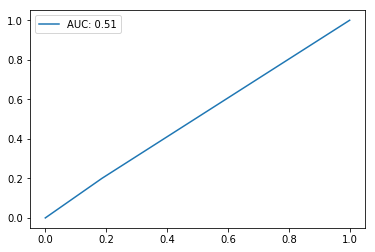

In [10]:
pred_class = model.predict(test_x)
pred_probs = pd.DataFrame(model.predict_proba(test_x), columns=['neg','pos'])

print('Accuracy: %.2f'% accuracy_score (test_y,pred_class))
print(classification_report(test_y,pred_class))

fpr_knn, tpr_knn, thresholds = roc_curve(test_y, pred_probs['pos'])
auc_knn = auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn, tpr_knn)
plt.legend(['AUC: %.2f' % auc_knn])

# Practice on Mushroom Data

### MUSHROOM

In [6]:
mushroom=pd.read_csv('D:/MANIPAL/TERM 2/DATASETS/datasets-master/mushroom.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [7]:
m_dummies = pd.get_dummies(mushroom.drop('class',axis = 1))# dropped the y
m_dummies['class'] = mushroom['class']

In [8]:
train_m, test_m = train_test_split(m_dummies,test_size=0.3,random_state=100)

In [9]:
train_x = train_m.drop('class', axis=1)
train_y = train_m['class']

test_x = test_m.drop('class', axis=1)
test_y = test_m['class']

In [10]:
#DECISION TREE, RANDOM FOREST, KNN, ADA BOOS TOGETHER

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

l=[]
model_1=DecisionTreeClassifier(random_state=100,max_depth=3)
model_2=RandomForestClassifier(random_state=100,n_estimators=300)
model_3=KNeighborsClassifier(n_neighbors=5)
model_4=AdaBoostClassifier(random_state=100, n_estimators=800)
a=(model_1,model_2,model_3,model_4)
for i in a:
    i.fit(train_x,train_y)
    pred_test=i.predict(test_x)
    a=accuracy_score(test_y,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost']).sort_values('Accuracy',ascending=False))
print(df)

                 Accuracy
Random Forest  100.000000
KNN            100.000000
Ada Boost      100.000000
Decision Tree   98.772277


In [24]:
from scipy.spatial.distance import euclidean

test_sample = test_x.iloc[0]
df_eds = pd.DataFrame(columns=['index','euclidean'])

for index,row in train_x.iterrows():#performs over DataFrame rows as (index, Series) pairs.
    curr_ed = euclidean(test_sample.values,row.values)
    df_eds = df_eds.append({'index': index,'euclidean':curr_ed},ignore_index=True)
df_eds=df_eds.sort_values(by='euclidean')
neighbors =df_eds.head()

train_y.loc[neighbors['index']].value_counts().index[0]


'EDIBLE'

In [25]:
df_eds.head()
neighbors

,index,euclidean
2649,733.0,255.001961
5047,797.0,255.001961
5769,653.0,255.001961
5541,748.0,255.001961
5242,745.0,255.001961


In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [143]:
pred_class = model.predict(test_x)
pred_probs = pd.DataFrame(model.predict_proba(test_x), columns=['neg','pos'])

print('Accuracy: %.2f'% accuracy_score (test_y,pred_class))
print(classification_report(test_y,pred_class))

Accuracy: 1.00
             precision    recall  f1-score   support

     EDIBLE       1.00      1.00      1.00      1348
  POISONOUS       1.00      1.00      1.00      1177

avg / total       1.00      1.00      1.00      2525



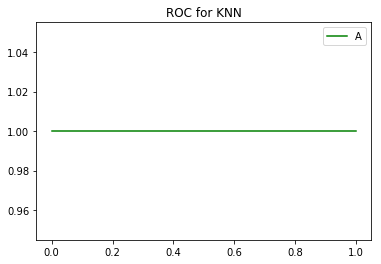

In [153]:
fpr_knn,tpr_knn,thresholds=roc_curve(test_y,pred_probs['pos'],pos_label='POISONOUS')
auc_knn=auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn,tpr_knn,color='g')
plt.legend('AUC: %.2f' % auc_knn)
plt.title('ROC for KNN')
plt.show()

# Hyper Parameter Tuning

In [210]:
hr=pd.read_csv('C:/Users/Administrator/Documents/HR Analytics.csv')
hr_dummies = pd.get_dummies(hr)

In [211]:
train, test = train_test_split(hr_dummies,test_size=0.3,random_state=100)

In [212]:
train_x = train.drop('Attrition', axis=1)
train_y = train['Attrition']

test_x = test.drop('Attrition', axis=1)
test_y = test['Attrition']

In [175]:
from sklearn.tree import DecisionTreeClassifier
depth=1
model =DecisionTreeClassifier(max_depth=depth)
model.fit(train_x,train_y)
train_predict_class = model.predict(train_x)
test_predict_class = model.predict(test_x)

train_error = 1-accuracy_score(train_y,train_predict_class)
test_error = 1-accuracy_score(test_y,test_predict_class)
print(train_error, test_error)

0.1622934888241011 0.15873015873015872


In [179]:
from sklearn.tree import DecisionTreeClassifier
#depth=1
depths = []
train_errors = []
test_errors = []

for depth in range(1,30):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_x,train_y)
    train_predict_class = model.predict(train_x)
    test_predict_class = model.predict(test_x)

    train_error = 1 - accuracy_score(train_y,train_predict_class)
    test_error = 1 - accuracy_score(test_y,test_predict_class)
    
    depths.append(depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
    #print(depths,train_errors, test_errors)

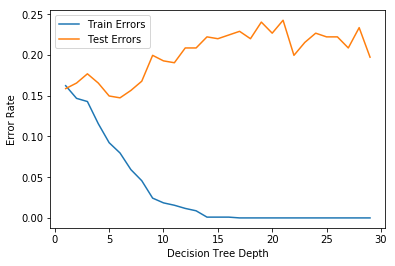

In [188]:
plt.plot(depths, train_errors)
plt.plot(depths, test_errors)
plt.legend(['Train Errors', 'Test Errors'])
plt.xlabel('Decision Tree Depth')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


# Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier(random_state=100,max_depth=1)
cv_results = cross_val_score(model, train_x,train_y,cv=10)
cv_results

array([0.83653846, 0.83653846, 0.83495146, 0.83495146, 0.82524272,
       0.83495146, 0.83495146, 0.83333333, 0.84313725, 0.81372549])

In [214]:
print(cv_results.mean())
print(cv_results.var())

0.8328321545197616
5.745496193345417e-05


In [220]:
depths1=[]
errors1=[]
for depth in range(1,30):
    model=DecisionTreeClassifier(random_state=100,max_depth=depth)
    cv_results = cross_val_score(model, train_x,train_y,cv=10)
    avg_acc = cv_results.mean()
    avg_err=1 - avg_acc
    depths1.append(depth)
    errors1.append(avg_err)


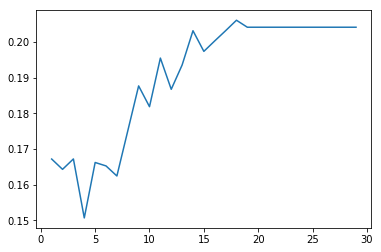

In [221]:
plt.plot(depths,errors)

# Grid Search CV

In [224]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(1,30))}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                       param_grid=params,
                       cv=10)
cv_model.fit(train_x, train_y)
cv_model.best_params_

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [225]:
cv_model.best_params_

{'max_depth': 4}

In [226]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(1,30)),
         'criterion': ['gini','entropy']}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                       param_grid=params,
                       cv=10)
cv_model.fit(train_x, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [228]:
#cv_model.grid_scores_
list(zip(cv_model.cv_results_['params'],
        cv_model.cv_results_['mean_test_score']))

[({'criterion': 'gini', 'max_depth': 1}, 0.8328474246841594),
 ({'criterion': 'gini', 'max_depth': 2}, 0.8357628765792031),
 ({'criterion': 'gini', 'max_depth': 3}, 0.8328474246841594),
 ({'criterion': 'gini', 'max_depth': 4}, 0.8493683187560739),
 ({'criterion': 'gini', 'max_depth': 5}, 0.8338192419825073),
 ({'criterion': 'gini', 'max_depth': 6}, 0.8347910592808552),
 ({'criterion': 'gini', 'max_depth': 7}, 0.8377065111758989),
 ({'criterion': 'gini', 'max_depth': 8}, 0.8250728862973761),
 ({'criterion': 'gini', 'max_depth': 9}, 0.8124392614188533),
 ({'criterion': 'gini', 'max_depth': 10}, 0.8182701652089407),
 ({'criterion': 'gini', 'max_depth': 11}, 0.8046647230320699),
 ({'criterion': 'gini', 'max_depth': 12}, 0.8134110787172012),
 ({'criterion': 'gini', 'max_depth': 13}, 0.8066083576287658),
 ({'criterion': 'gini', 'max_depth': 14}, 0.7968901846452867),
 ({'criterion': 'gini', 'max_depth': 15}, 0.8027210884353742),
 ({'criterion': 'gini', 'max_depth': 16}, 0.7998056365403304),
 

# GRID SEARCH RANDOM FOREST

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
#Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [17]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [18]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}